# Credit card fraud detection II

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load the dataset

In [2]:
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

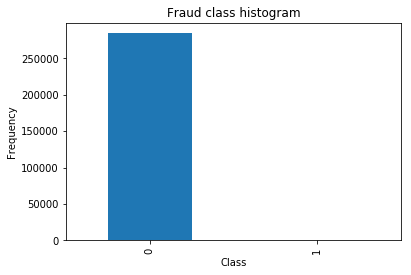

In [3]:
# Check the target class

count_class = pd.value_counts(data['Class'], sort = True).sort_index()
count_class.plot(kind = 'bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

## Data processing

In [4]:
# Set input and target variables + resampling

# 1. Normalize the amount column

from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
# 2. Assign X and y

X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

C:\Users\maoja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maoja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [6]:
# Resampling

# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Pick the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Append the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices, :]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Show ratio
print('Percentage of normal transactions: ', len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print('Percentage of fraud transactions: ', len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print('Total number of transactions in resampled data: ', len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


C:\Users\maoja\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\maoja\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


## Training and testing

In [7]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('Number of transactions train datset: ', len(X_train))
print('Number of transactions test dataset: ', len(X_test))
print('Total number of transactions: ', len(X_train) + len(X_test))

Number of transactions train datset:  199364
Number of transactions test dataset:  85443
Total number of transactions:  284807


In [8]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

print('Number of transactions train datset: ', len(X_train_undersample))
print('Number of transactions test dataset: ', len(X_test_undersample))
print('Total number of transactions: ', len(X_train_undersample) + len(X_test_undersample))

Number of transactions train datset:  688
Number of transactions test dataset:  296
Total number of transactions:  984


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [10]:
# Print K_fold_score

def print_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(5, shuffle = False)
    
    c_param_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
    results_table = pd.DataFrame(index = range(len(c_param_range), 2), columns = ['C_parameter', 'Mean_recall_score'])
    results_table['C_parameter'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('----------')
        print('C parameter: ', c_param)
        print('----------')
        print('')
        
        recall_accs = []
        
        for iteration, indices in enumerate(fold.split(x_train_data)):
            lr = LogisticRegression(C = c_param, penalty = 'l2')
            
            lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
            
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, ': recall score = ', recall_acc)
            
        results_table.ix[j, 'Mean_recall_score'] = np.mean(recall_accs)
        j += 1
        
        print('')
        print('Mean recall score: ', np.mean(recall_accs))
        print('')
    
    results_table['Mean_recall_score'] = pd.to_numeric(results_table['Mean_recall_score'])
    best_idx = results_table['Mean_recall_score'].idxmax()
    best_c = results_table.loc[best_idx]['C_parameter']
    
    print('Best model to choose from cross validation is with C = ', best_c)
    
    return best_c

In [11]:
best_c = print_Kfold_scores(X_train_undersample, y_train_undersample)

----------
C parameter:  0.1
----------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9830508474576272
Iteration  3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.9090909090909091

Mean recall score:  0.9128230199509512

----------
C parameter:  0.2
----------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9830508474576272
Iteration  3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.9090909090909091

Mean recall score:  0.9128230199509512

----------
C parameter:  0.3
----------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9830508474576272
Iteration  3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.9090909090909091

Mean recall score:  0.9128230199509512

----------

C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.9090909090909091

Mean recall score:  0.9155627459783485

----------
C parameter:  0.7
----------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.8767123287671232
Iteration  2 : recall score =  0.9830508474576272
Iteration  3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.9090909090909091

Mean recall score:  0.9155627459783485

----------
C parameter:  0.8
----------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.8767123287671232
Iteration  2 : recall score =  0.9830508474576272
Iteration  3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.9090909090909091

Mean recall score:  0.9155627459783485

----------
C parameter:  0.9
----------

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.8767123287671232
Iteration  2 : recall score =  0.9830508474576272
Iteration  3 : re

C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maoja\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: Future

In [12]:
# Plot confusion matrix

import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    else:
        1
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.8979591836734694


C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


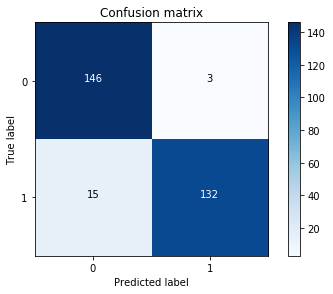

In [13]:
lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision = 2)

print('Recall metric in the testing dataset: ', cnf_matrix[1, 1]/(cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = 'Confusion matrix')
plt.show()

C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.9115646258503401


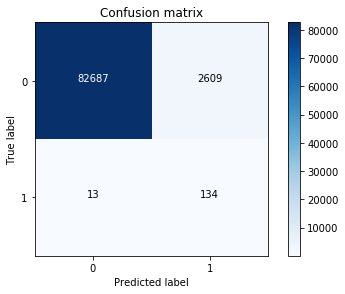

In [14]:
# Apply the model to the whole dataset

lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

print('Recall metric in the testing dataset: ', cnf_matrix[1, 1]/(cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = 'Confusion matrix')
plt.show()

C:\Users\maoja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


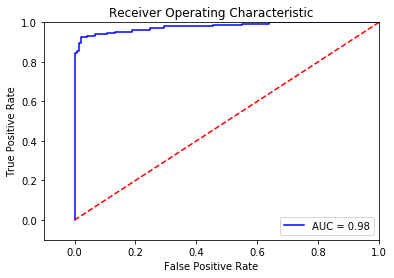

In [15]:
# Plot ROC curve and precision-recall curve

lr = LogisticRegression(C = best_c, penalty = 'l2')
y_pred_undersample_score = lr.fit(X_train_undersample, y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(), y_pred_undersample_score)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()